In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, roc_auc_score, roc_curve , accuracy_score, precision_score ,recall_score , f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [2]:
df = pd.read_csv("../data/internet_service_churn.csv")
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
df.shape

(72274, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [5]:

for i, n in enumerate(df.isnull().sum()):
    if n!=0:
        print(f'{df.columns[i]} = {round(n/len(df),3)}%')

reamining_contract = 0.298%
download_avg = 0.005%
upload_avg = 0.005%


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


In [9]:
df['churn'].value_counts(normalize=True)

churn
1    0.554141
0    0.445859
Name: proportion, dtype: float64

In [10]:
df_nulls = df[df['download_avg'].isna()]
print(df_nulls.shape) 
df_nulls       

(381, 11)


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
25,617,0,0,11.93,21,NaN,0,NaN,NaN,0,0
52,1151,0,0,11.93,24,NaN,0,NaN,NaN,0,0
54,1169,1,1,11.93,24,NaN,0,NaN,NaN,0,0
63,1413,0,0,11.93,24,NaN,0,NaN,NaN,0,0
85,1805,0,0,11.93,24,NaN,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71835,1680161,1,0,0.00,0,1.87,0,NaN,NaN,0,0
71836,1680174,1,1,0.00,0,1.97,0,NaN,NaN,0,0
71837,1680212,1,1,0.00,0,1.97,0,NaN,NaN,0,0
71838,1680257,1,1,0.00,0,1.97,0,NaN,NaN,0,0


In [11]:
mismatches = df[df['download_avg'].isna() != df['upload_avg'].isna()]
print(mismatches.shape)
mismatches.head()


(0, 11)


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


In [12]:
df1 = df.copy()

In [ ]:
df1 = df1.rename(columns={
    "is_tv_subscriber": "tv_subscriber",
    "is_movie_package_subscriber": "movie_package_subscriber",
    "subscription_age": "subscription_years",
    "bill_avg": "avg_bill_3",
    "reamining_contract": "remaining_contract",
    "service_failure_count": "service_failures",
    "download_over_limit": "over_download_limit",
    "download_avg": "download_avg_3",
    "upload_avg": "upload_avg_3",
})

In [14]:
df1[(df1["subscription_months"] == 0) & (df1["remaining_contract"] == 0)].shape


(148, 11)

In [15]:
df1[(df1["subscription_months"] == 0) & (df1["remaining_contract"] > 0)].shape


(58, 11)

here im replacing the null vals in download/upload avg with 0 if they have 0 subscription months and no churn as it may strongly indicate they are new customers 
(0 subscription months, 0 churn → they likely never used the service, so download/upload = 0 is reasonable).

In [16]:
df1.loc[(df1['subscription_months']==0)& (df1['churn']==0) & (df1['download_avg'].isna()) , 'download_avg'] = 0
df1.loc[(df1['subscription_months']==0)& (df1['churn']==0) & (df1['upload_avg'].isna())  , 'upload_avg'] = 0

In [17]:
df1.isna().sum()

id                              0
tv_subscriber                   0
movie_package_subscriber        0
subscription_months             0
avg_bill                        0
remaining_contract          21572
service_failures                0
download_avg                  344
upload_avg                    344
over_download_limit             0
churn                           0
dtype: int64

In [18]:
df1.loc[df1['download_avg'].isna(), 'subscription_months'].value_counts()



subscription_months
0.02     126
0.01      74
0.03      22
0.04      18
11.93      7
        ... 
0.63       1
0.76       1
0.07       1
0.23       1
0.08       1
Name: count, Length: 94, dtype: int64

since theyre being billed i will Impute based on similar segment

new customers

In [19]:
df1.loc[(df1['subscription_months']<1)& (df1['churn']==0) & (df1['download_avg'].isna()) , 'download_avg'] = 0
df1.loc[(df1['subscription_months']<1)& (df1['churn']==0) & (df1['upload_avg'].isna())  , 'upload_avg'] = 0

In [20]:
df1.isna().sum()

id                              0
tv_subscriber                   0
movie_package_subscriber        0
subscription_months             0
avg_bill                        0
remaining_contract          21572
service_failures                0
download_avg                   91
upload_avg                     91
over_download_limit             0
churn                           0
dtype: int64

In [21]:
df1.loc[
    (df1['subscription_months'] == 11.93) &
    (df1['download_avg'].isna()) &
    (df1['upload_avg'].isna()),
    ['id', 'avg_bill', 'churn', 'service_failures', 'remaining_contract']
]


,id,avg_bill,churn,service_failures,remaining_contract
25,617,21,0,0,NaN
52,1151,24,0,0,NaN
54,1169,24,0,0,NaN
63,1413,24,0,0,NaN
85,1805,24,0,0,NaN
113,2248,25,0,0,0.4
132,2852,24,0,0,NaN


In [22]:
df1.loc[df1['download_avg'].isna(), 'subscription_months'].value_counts()

subscription_months
11.93    7
11.92    6
2.35     2
6.13     2
10.92    1
        ..
1.18     1
1.17     1
1.07     1
1.05     1
1.02     1
Name: count, Length: 78, dtype: int64

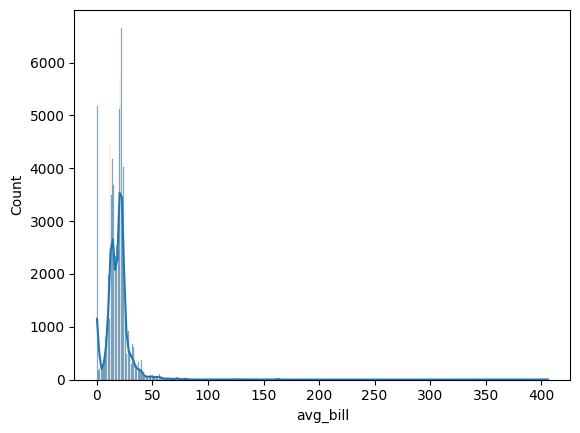

count    72274.000000
mean        18.942483
std         13.215386
min          0.000000
25%         13.000000
50%         19.000000
75%         22.000000
max        406.000000
Name: avg_bill, dtype: float64


In [24]:

sns.histplot(df1['avg_bill'], kde=True)
plt.show()

print(df1['avg_bill'].describe())

In [ ]:
Q1 = df1['avg_bill'].quantile(0.25)
Q3 = df1['avg_bill'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['avg_bill'] < lower_bound) | (df1['avg_bill'] > upper_bound)]
outliers.head() 

,id,tv_subscriber,movie_package_subscriber,subscription_months,avg_bill,remaining_contract,service_failures,download_avg,upload_avg,over_download_limit,churn
17,417,0,0,6.45,40,NaN,0,0.0,0.0,0,1
19,507,1,1,11.93,65,0.21,0,116.8,12.1,0,0
23,600,0,0,11.93,41,NaN,0,24.1,3.2,0,0
29,682,1,0,10.93,63,0.00,0,38.1,7.9,0,1
31,696,0,0,9.22,80,NaN,0,235.0,6.0,0,1


creating new feature - bill_per_month - 

In [27]:
df1['bill_per_month'] = df1['avg_bill'] / df1['subscription_months']

In [28]:
df1['bill_per_month'].head()

0    2.092050
1    0.000000
2    1.795735
3    3.056769
4    0.000000
Name: bill_per_month, dtype: float64

In [29]:
unique_bills = df['bill_avg'].unique()

print(unique_bills)

[ 25   0  16  21  32  18  14  17  10  23  22  40  65  24  41  20  13  63
   9  80  54  33 129  45  79  39  37  56  12  69  46  50  15  53  30  11
   8   7  59  29  34   5  48  42  19  31   1 162  66  26  35  71  75  43
   6  57   3  38  27   2  98  36  28  55  44  76   4  73  64  49  51  81
  52 126  61  47 406 103  74  89  58  60 150  72  77 112 116  78  67 121
  68 139  62 147  70 130 151 118 160 106 148 210 113 122 163 157 142 104
 285 128 138 108 146 141 111 119 145 140 143 123 136 102 134  85  86 144
 137  94 301 115 109 105 325  90  97 154 132 159 107 131  92 188 206 209
 125  99 110 161 120 198 114  84 221  95 164 135  88  87 127  83  96 101
 217 386  91 245 100 278 372 191 133 269 237 207 266 231 156 213 174]


In [ ]:

df1['download_avg'] = df1.groupby(['subscription_months', 'avg_bill'])['download_avg']\
    .transform(lambda x: x.fillna(x.median()))
df1['upload_avg'] = df1.groupby(['subscription_months', 'avg_bill'])['upload_avg']\
    .transform(lambda x: x.fillna(x.median()))